# Sarcasm Detection
 **Acknowledgement**

Misra, Rishabh, and Prahal Arora. "Sarcasm Detection using Hybrid Neural Network." arXiv preprint arXiv:1908.07414 (2019).

**Required Files given in below link.**

https://drive.google.com/drive/folders/1xUnF35naPGU63xwRDVGc-DkZ3M8V5mMk

## Install `Tensorflow2.0` 

In [1]:
!!pip uninstall tensorflow
!pip install tensorflow==2.0.0

     |████████████████████████████████| 86.3MB 122kB/s 
     |████████████████████████████████| 3.8MB 49.1MB/s 
     |████████████████████████████████| 450kB 54.4MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=53c446257275060e0a9ac721bf477201246c0c4901d49ccb829c01ec0f1954e7
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.10.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: tensorboard 2.2.2
    Uninstalling tensorboard-2.2.2:
      Successfully uninstalled tensorboard-2.2.2
  Found existing installation: tensorflow-estimator 2.2.0
    Uninstalling tensorflow-estimator-2.2.0:
      Successfully uninstalled tensorflow-estimator-2.2.0


## Get Required Files from Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [3]:
import os
os.chdir('/content/drive/My Drive/Colab Notebooks')
!ls

 AIML_Online.ipynb
'Aligned Face Dataset from Pinterest.zip'
'Copy of embedding2.ipynb'
 Data
'Face_mask_segmentation_Project_Solution (1).ipynb'
 Face_mask_segmentation_Project_Solution.ipynb
 Face_mask_segmentation_Questions_Project_CV_AIML_Online.ipynb
'Face recognition - Anchal Bhatia - Project - CV - AIML Online.ipynb'
'Face recognition - Questions - Project - CV - AIML Online.ipynb'
 Face_recognition_Sanket_Shetye_Project_CV_AIML_Online.ipynb
'Few Shot Learning - V1 (1).ipynb'
'Few Shot Learning - V1.ipynb'
 glove
 glove.6B.100d.txt
 glove.6B.200d.txt
 glove.6B.300d.txt
 glove.6B.50d.txt
 images.npy
 model-0.70.h5
 model-0.84.h5
 model-0.92.h5
 NLP_Project_Sarcasm_Detection_Anchal.ipynb
 pins
 PINS
 Project.ipynb
'Sarcasm Detection.zip'
 SeqNLP_Project1_Questions.ipynb
 SeqNLP_Project1_Solution_Anchal.ipynb
'Siamese_SigNet_BHSig260 (1).ipynb'
 Siamese_SigNet_BHSig260.ipynb
 train.csv
'UNet-StyleV1 (1).ipynb'
 UNet-StyleV1.ipynb
 validation.csv
 vgg_face_weights.h5


In [4]:
#Set your project path 
project_path =  '/content/drive/My Drive/Colab Notebooks'

#**## Reading and Exploring Data**

## Read Data "Sarcasm_Headlines_Dataset.json". Explore the data and get  some insights about the data. ( 4 marks)
Hint - As its in json format you need to use pandas.read_json function. Give paraemeter lines = True.

In [5]:
import zipfile
zip_ref = zipfile.ZipFile("/content/drive/My Drive/Colab Notebooks/Sarcasm Detection.zip", 'r')
zip_ref.extractall("Data")
zip_ref.close()

In [6]:
import pandas as pd
pd.set_option('display.max_colwidth', -1)
data = pd.read_json("Data/Sarcasm Detection/Data/Sarcasm_Headlines_Dataset.json",lines=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


## Drop `article_link` from dataset. ( 2 marks)
As we only need headline text data and is_sarcastic column for this project. We can drop artical link column here.

In [7]:
data.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-black-code_us_5861fbefe4b0de3a08f600d5,former versace store clerk sues over secret 'black code' for minority shoppers,0
1,https://www.huffingtonpost.com/entry/roseanne-revival-review_us_5ab3a497e4b054d118e04365,"the 'roseanne' revival catches up to our thorny political mood, for better and worse",0
2,https://local.theonion.com/mom-starting-to-fear-son-s-web-series-closest-thing-she-1819576697,mom starting to fear son's web series closest thing she will have to grandchild,1
3,https://politics.theonion.com/boehner-just-wants-wife-to-listen-not-come-up-with-alt-1819574302,"boehner just wants wife to listen, not come up with alternative debt-reduction ideas",1
4,https://www.huffingtonpost.com/entry/jk-rowling-wishes-snape-happy-birthday_us_569117c4e4b0cad15e64fdcb,j.k. rowling wishes snape happy birthday in the most magical way,0


## Get the Length of each line and find the maximum length. ( 4 marks)
As different lines are of different length. We need to pad the our sequences using the max length.

In [8]:
sentences = data["headline"].values
sentences[:5]

array(["former versace store clerk sues over secret 'black code' for minority shoppers",
       "the 'roseanne' revival catches up to our thorny political mood, for better and worse",
       "mom starting to fear son's web series closest thing she will have to grandchild",
       'boehner just wants wife to listen, not come up with alternative debt-reduction ideas',
       'j.k. rowling wishes snape happy birthday in the most magical way'],
      dtype=object)

In [9]:
labels = data["is_sarcastic"].values
labels[:5]

array([0, 0, 1, 1, 0])

In [10]:
urls = data["article_link"].values
urls[:5]

array(['https://www.huffingtonpost.com/entry/versace-black-code_us_5861fbefe4b0de3a08f600d5',
       'https://www.huffingtonpost.com/entry/roseanne-revival-review_us_5ab3a497e4b054d118e04365',
       'https://local.theonion.com/mom-starting-to-fear-son-s-web-series-closest-thing-she-1819576697',
       'https://politics.theonion.com/boehner-just-wants-wife-to-listen-not-come-up-with-alt-1819574302',
       'https://www.huffingtonpost.com/entry/jk-rowling-wishes-snape-happy-birthday_us_569117c4e4b0cad15e64fdcb'],
      dtype=object)

In [11]:
data["is_sarcastic"].value_counts()

0    14985
1    11724
Name: is_sarcastic, dtype: int64

In [12]:
data['len'] = data['headline'].apply(lambda x: len(x.split(" ")))
data.head()

,article_link,headline,is_sarcastic,len
0,https://www.huffingtonpost.com/entry/versace-black-code_us_5861fbefe4b0de3a08f600d5,former versace store clerk sues over secret 'black code' for minority shoppers,0,12
1,https://www.huffingtonpost.com/entry/roseanne-revival-review_us_5ab3a497e4b054d118e04365,"the 'roseanne' revival catches up to our thorny political mood, for better and worse",0,14
2,https://local.theonion.com/mom-starting-to-fear-son-s-web-series-closest-thing-she-1819576697,mom starting to fear son's web series closest thing she will have to grandchild,1,14
3,https://politics.theonion.com/boehner-just-wants-wife-to-listen-not-come-up-with-alt-1819574302,"boehner just wants wife to listen, not come up with alternative debt-reduction ideas",1,13
4,https://www.huffingtonpost.com/entry/jk-rowling-wishes-snape-happy-birthday_us_569117c4e4b0cad15e64fdcb,j.k. rowling wishes snape happy birthday in the most magical way,0,11


In [13]:
data['len'].max()

39

In [14]:
data = data[['headline', 'is_sarcastic']]

In [15]:
data.head()

,headline,is_sarcastic
0,former versace store clerk sues over secret 'black code' for minority shoppers,0
1,"the 'roseanne' revival catches up to our thorny political mood, for better and worse",0
2,mom starting to fear son's web series closest thing she will have to grandchild,1
3,"boehner just wants wife to listen, not come up with alternative debt-reduction ideas",1
4,j.k. rowling wishes snape happy birthday in the most magical way,0


#**## Modelling**

## Import required modules required for modelling.

In [16]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Flatten, Bidirectional, GlobalMaxPool1D
from tensorflow.keras.models import Model, Sequential
from keras.optimizers import Adam

Using TensorFlow backend.


# Set Different Parameters for the model. ( 2 marks)

In [17]:
max_features = 10000
maxlen = 40
embedding_size = 200

## Apply Keras Tokenizer of headline column of your data.  ( 4 marks)
Hint - First create a tokenizer instance using Tokenizer(num_words=max_features) 
And then fit this tokenizer instance on your data column df['headline'] using .fit_on_texts()

In [18]:
# convert the sentences (strings) into integers
num_words=max_features
tokenizer = Tokenizer(num_words)
tokenizer.fit_on_texts(data.headline)
#sequences = tokenizer.texts_to_sequences(data.headline)

# Define X and y for your model.

In [19]:
X = tokenizer.texts_to_sequences(data['headline'])
X = pad_sequences(X, maxlen = maxlen,padding='post')
y = np.asarray(data['is_sarcastic'])

print("Number of Samples:", len(X))
print(X[0])
print("Number of Labels: ", len(y))
print(y[0])

Number of Samples: 26709
[ 307  678 3336 2297   47  381 2575    5 2576 8433    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0]
Number of Labels:  26709
0


## Get the Vocabulary size ( 2 marks)
Hint : You can use tokenizer.word_index.

In [20]:
# get word -> integer mapping
word2idx = tokenizer.word_index
print('Found %s unique tokens.' % len(word2idx))
# pad sequences so that we get a N x T matrix
#data_new = pad_sequences(sequences, maxlen=maxlen)
#print('Shape of data tensor:', data.shape)

Found 29656 unique tokens.


#**## Word Embedding**

## Get Glove Word Embeddings

In [21]:
glove_file = project_path + "/Data/Sarcasm Detection/Data/glove.6B.zip"

In [22]:
#Extract Glove embedding zip file
from zipfile import ZipFile
with ZipFile(glove_file, 'r') as z:
  z.extractall()
  

# Get the Word Embeddings using Embedding file as given below.

In [23]:
EMBEDDING_FILE = './glove.6B.200d.txt'

embeddings = {}
for o in open(EMBEDDING_FILE):
    word = o.split(" ")[0]
    # print(word)
    embd = o.split(" ")[1:]
    embd = np.asarray(embd, dtype='float32')
    #print(embd.shape)
    embeddings[word] = embd
print('Found %s word vectors.' % len(embeddings[word]))




Found 200 word vectors.


# Create a weight matrix for words in training docs

In [24]:
items= word2idx.items()
len(items)

29656

In [25]:
embedding_matrix = np.zeros((num_words, 200))

for word, i in tokenizer.word_index.items():
  if i<10000:
    embedding_vector = embeddings.get(word)
    if embedding_vector is not None:
      embedding_matrix[i] = embedding_vector

len(embeddings.values())  

400000

## Create and Compile your Model  ( 7 marks)
Hint - Use Sequential model instance and then add Embedding layer, Bidirectional(LSTM) layer, then dense and dropout layers as required. 
In the end add a final dense layer with sigmoid activation for binary classification.


In [26]:
### Embedding layer for hint 
## model.add(Embedding(num_words, embedding_size, weights = [embedding_matrix]))
### Bidirectional LSTM layer for hint 
## model.add(Bidirectional(LSTM(128, return_sequences = True)))

In [27]:
batch_size = 100
epochs = 5
VALIDATION_SPLIT = 0.2



In [28]:
def lstm():
    model = Sequential()
    
    model.add(Embedding(max_features, embedding_size, weights = [embedding_matrix]))
    
    model.add(Bidirectional(LSTM(128, return_sequences=True, recurrent_dropout=0.1, dropout=0.1)))
    
    model.add(Bidirectional(LSTM(32, recurrent_dropout=0.1, dropout=0.1)))
    
    model.add(Dense(1, activation='sigmoid'))
    
    # Compile the model
    model.compile(optimizer = 'rmsprop',
                  loss = 'binary_crossentropy',
                  metrics = ['acc'])
    
    return model

lsmod = lstm()

# Fit your model with a batch size of 100 and validation_split = 0.2. and state the validation accuracy ( 5 marks)


In [29]:
# Train the model
lshist = lsmod.fit(X, y,
         epochs = epochs,
         batch_size = batch_size,
         validation_split=VALIDATION_SPLIT)

Train on 21367 samples, validate on 5342 samples
Epoch 1/5
21367/21367 [==============================] - 104s 5ms/sample - loss: 0.4426 - acc: 0.7871 - val_loss: 0.3664 - val_acc: 0.8385
Epoch 2/5
21367/21367 [==============================] - 97s 5ms/sample - loss: 0.3007 - acc: 0.8711 - val_loss: 0.3384 - val_acc: 0.8444
Epoch 3/5
21367/21367 [==============================] - 98s 5ms/sample - loss: 0.2375 - acc: 0.9050 - val_loss: 0.3103 - val_acc: 0.8714
Epoch 4/5
21367/21367 [==============================] - 97s 5ms/sample - loss: 0.1967 - acc: 0.9220 - val_loss: 0.3068 - val_acc: 0.8721
Epoch 5/5
21367/21367 [==============================] - 98s 5ms/sample - loss: 0.1631 - acc: 0.9347 - val_loss: 0.3097 - val_acc: 0.8761


In [30]:
def plot(history):
    hist = history.history
    train_loss, train_acc = hist['loss'], hist['acc']
    val_loss, val_acc = hist['val_loss'], hist['val_acc']
    epochs = range(1, len(train_acc)+1)
    
    plt.plot(epochs, train_acc, 'g', label='Training acc')
    plt.plot(epochs, val_acc, 'o', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.figure()
    plt.plot(epochs, train_loss, 'g', label='Training loss')
    plt.plot(epochs, val_loss, 'o', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

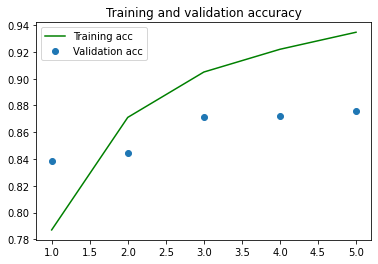

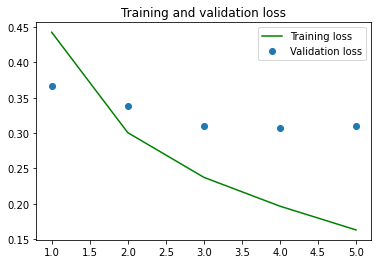

In [31]:
import matplotlib.pyplot as plt
plot(lshist)